# Installations

In [1]:
from matplotlib import pyplot as plt
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from PIL import Image
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loading images

In [7]:
# Load Baoze's local image directory
image_dir = r"C:\Users\linof\Downloads\Unsorted\GDR Bench\GDRBench_AllowedShare2\FundusDG_mini\DDR"

# Downloaded from the images associated with GDRBench (https://github.com/chehx/DGDR/blob/main/GDRBench/README.md). Taken from the DDR folder

In [8]:
# Loads images
train_set, val_set = keras.utils.image_dataset_from_directory(
    image_dir,
    labels="inferred",
    label_mode="categorical",
    image_size=(512, 512),
    validation_split=0.2,
    seed=0,
    subset="both"
    )

Found 11655 files belonging to 3 classes.
Using 9324 files for training.
Using 2331 files for validation.


In [9]:
# Define a function to resize images
def resize_image(image, label):
    resized_image = tf.image.resize(image, (256, 256))
    return resized_image, label

# Resize images in the training set
train_set_resized = train_set.map(resize_image)

# Resize images in the validation set
val_set_resized = val_set.map(resize_image)

# Create model

In [12]:
# Define the model
model = models.Sequential([
    layers.InputLayer(shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model

In [13]:
# Train the model
history = model.fit(train_set_resized,
                    validation_data=val_set_resized,
                    epochs=10)

Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.5419 - loss: 6.4382 - val_accuracy: 0.6482 - val_loss: 0.7835
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6307 - loss: 0.7726 - val_accuracy: 0.6598 - val_loss: 0.7275
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.6614 - loss: 0.7230 - val_accuracy: 0.6701 - val_loss: 0.7199
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.6597 - loss: 0.7374 - val_accuracy: 0.6855 - val_loss: 0.6895
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6948 - loss: 0.6725 - val_accuracy: 0.6885 - val_loss: 0.6985
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6989 - loss: 0.6537 - val_accuracy: 0.6817 - val_loss: 0.6826
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7131 - loss: 0.6277 - val_accuracy: 0.7121 - val_loss: 0.6536
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.7212 - loss: 0.6224 - val_accu

# Save the model

In [12]:
# Declare the save path

# Baoze's local path
# save_path = r"C:\Users\linof\OneDrive - McMaster University\Desktop\University\Third\3P04\model.keras"

# Github local path
save_path = "model2.keras"

In [13]:
# Save the model
model.save(save_path)

# Load model

In [11]:
# Load the model
model = load_model(save_path)

# Use the model

### Predict an image

In [14]:
# grabs the model classifications
label_names = train_set.class_names

In [93]:
# takes a random test image from training set
test_image = train_set_resized.take(1)

image, label = next(iter(test_image))

# Reshape the image tensor to match the expected input shape of the model
image = tf.expand_dims(image[0], axis=0)

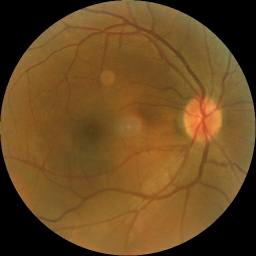

In [94]:
# Convert tensor to PIL image for display
pil_image = tf.keras.preprocessing.image.array_to_img(image[0])
display(pil_image)

In [95]:
res = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [96]:
# predicted and display prediction

predicted_classes = np.argmax(res, axis=1)
print(predicted_classes)
print(label_names[predicted_classes[0]])

[1]
moderate_npdr


### Predict a given image

In [15]:
label_names = train_set.class_names

In [16]:
# Provide the image

# Baoze's local image
# img_directory = r"C:\Users\linof\Downloads\Unsorted\GDR Bench\GDRBench_AllowedShare2\FundusDG_mini\DDR\severe_npdr\20170622080837660.jpg"

# Github local image
img_directory = r"sample_images\mild_npdr\20170527183633885.jpg"

In [17]:
# Load the image using tf.keras.preprocessing
pil_image = tf.keras.preprocessing.image.load_img(img_directory, target_size=(256, 256))

# Convert the image to a NumPy array
image_array = tf.keras.preprocessing.image.img_to_array(pil_image)

# Expand the dimensions to create a batch (since your model expects batches)
image_tensor = tf.expand_dims(image_array, axis=0)

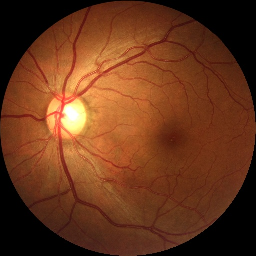

In [18]:
# Display the image
display(pil_image)

In [19]:
res = model.predict(image_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [20]:

predicted_classes = np.argmax(res, axis=1)
print(predicted_classes)
print(label_names[predicted_classes[0]])


[2]
nodr


# View results

## Accuracy

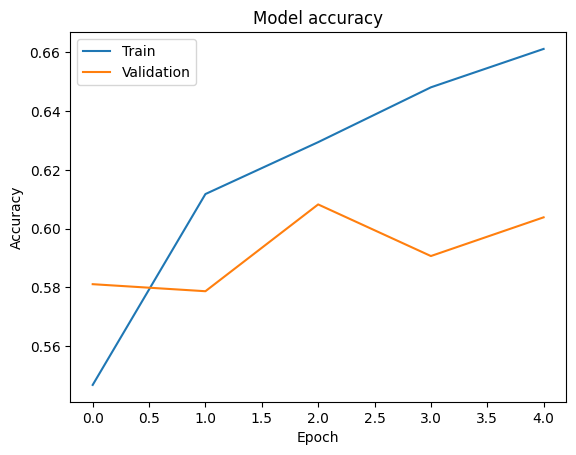

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Loss

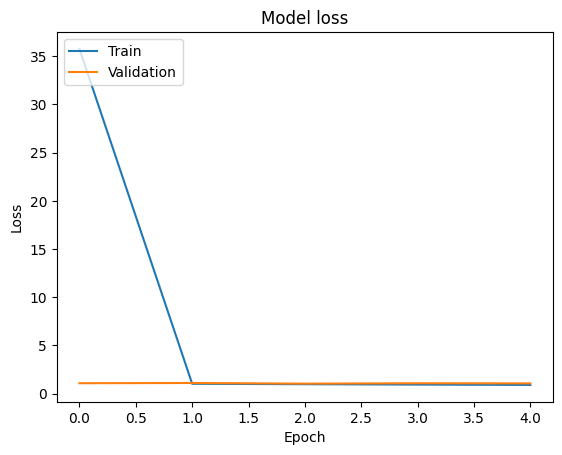

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Confusion matrix

79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step


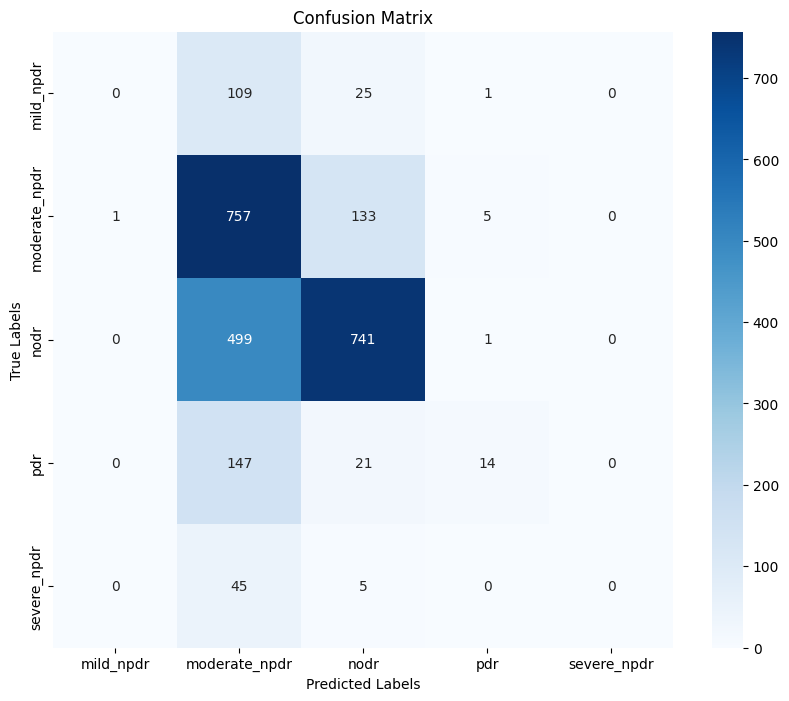

In [22]:
# Predict classes for the validation set
predictions = model.predict(val_set_resized)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels for the validation set
true_classes = np.concatenate([y for x, y in val_set_resized], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Code to calculate sensitivity and specificity

In [2]:
# Modifying the provided code to include labels and print the sensitivity and specificity with labels
import numpy as np

# Function to calculate sensitivity and specificity for each class
def calc_sens_spec(conf_matrix, num_classes):
    sens = np.zeros(num_classes)
    spec = np.zeros(num_classes)
    
    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - TP
        FP = sum(conf_matrix[:, i]) - TP
        TN = sum(sum(conf_matrix)) - (TP + FP + FN)
        
        sens[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
        spec[i] = TN / (TN + FP) if (TN + FP) > 0 else 0
        
    return sens, spec

# Calculate sensitivity and specificity for each class
confusion_matrix = np.array([
    [854, 355, 15],
    [139, 706, 68],
    [4, 131, 59]
])

labels = ["No DR", "Moderate DR", "PDR"]
sensitivity, specificity = calc_sens_spec(confusion_matrix, 3)

# Printing sensitivity and specificity with labels
for i, label in enumerate(labels):
    print(f"{label} - Sensitivity: {sensitivity[i]*100:.2f}%, Specificity: {specificity[i]*100:.2f}%")


No DR - Sensitivity: 69.77%, Specificity: 87.08%
Moderate DR - Sensitivity: 77.33%, Specificity: 65.73%
PDR - Sensitivity: 30.41%, Specificity: 96.12%


In [3]:
import numpy as np

# Function to calculate sensitivity and specificity
def calc_sens_spec_binary(conf_matrix):
    # Assuming the first class is "No DR" and the second class is "Moderate DR/PDR combined"
    TP = conf_matrix[0, 0]
    FN = sum(conf_matrix[0, :]) - TP
    FP = sum(conf_matrix[:, 0]) - TP
    TN = sum(sum(conf_matrix)) - (TP + FP + FN)
    
    sens = TP / (TP + FN) if (TP + FN) > 0 else 0
    spec = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    return sens, spec

# Original confusion matrix
confusion_matrix = np.array([
    [854, 355, 15],
    [139, 706, 68],
    [4, 131, 59]
])

# Combine "Moderate DR" and "PDR" into one category
combined_matrix = np.array([
    [confusion_matrix[0, 0], sum(confusion_matrix[0, 1:])],
    [sum(confusion_matrix[1:, 0]), sum(confusion_matrix[1:, 1:].flatten())]
])

sensitivity, specificity = calc_sens_spec_binary(combined_matrix)

labels = ["No DR", "Moderate DR/PDR"]
for i, label in enumerate(labels):
    if i == 0:
        print(f"{label} - Sensitivity: {sensitivity*100:.2f}%, Specificity: {specificity*100:.2f}%")
    else:
        # For the combined category, sensitivity and specificity values don't directly apply as it's now a binary problem
        # Thus, we only print the values once for the "No DR" category.
        break


No DR - Sensitivity: 69.77%, Specificity: 87.08%
